In [1]:
from sympy import symbols, integrate, Piecewise, sympify, simplify
from sympy.plotting import plot, PlotGrid

In [2]:
T1, T2, T3, T4, T, DT, Am, Jm, Sm, Cm = symbols("T1, T2, T3, T4, T, DT, Am, Jm, Sm, Cm", Positive=True)

In [3]:
times = [T1, T2, T1, T3, T1, T2, T1, T4, T1, T2, T1, T3, T1, T2, T1]

In [4]:
def accumulate(inputs):
    acc = []
    for i in range(len(inputs)):
        if i == 0:
            acc.append(inputs[i])
        else:
            acc.append(acc[i - 1].subs(T, times[i - 1]) + inputs[i])
    return acc

In [5]:
integrals = [{'name': 'Crackle'}, {'name': 'Snap'}, {'name': 'Jerk'}, {'name': 'Acceleration'}, {'name': 'Velocity'}, {'name': 'Distance'}]
integrals[0]['acc'] = [Cm, sympify(0), -Cm, sympify(0), -Cm, sympify(0), Cm, sympify(0), -Cm, sympify(0), Cm, sympify(0), Cm, sympify(0), -Cm]

for previous, current in zip(integrals, integrals[1:]):
    current['parts'] = [integrate(x, T) for x in previous['acc']]
    current['acc'] = accumulate(current['parts'])
    current['function'] = Piecewise(*[(current['acc'][i].subs(T, T - sum(times[:i])), T <= sum(times[:i + 1])) for i in range(len(times))])

for x in integrals:
    x['function'] = Piecewise(*[(x['acc'][i].subs(T, T - sum(times[:i])), T <= sum(times[:i + 1])) for i in range(len(times))])

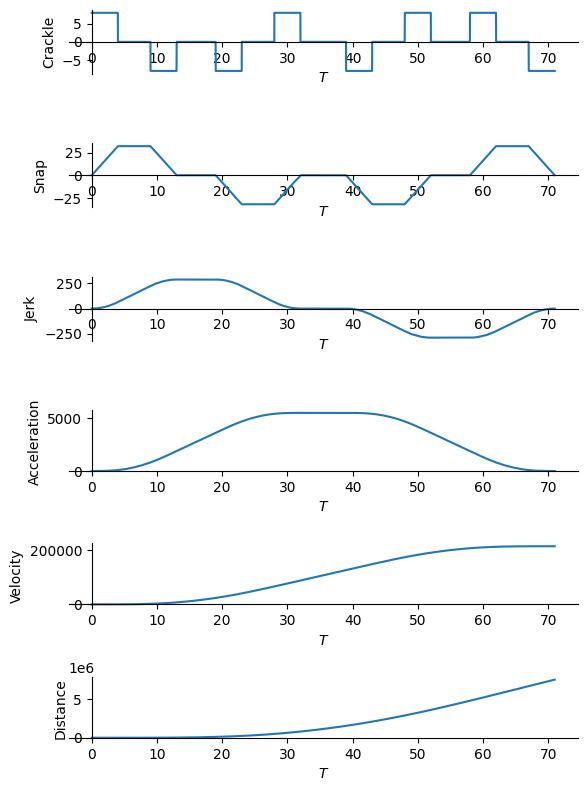

In [6]:
PlotGrid(len(integrals), 1, *[plot(x['function'].subs({T1: 4, T2: 5, T3: 6, T4: 7, Cm: 8}), (T, 0, 71), show=False, ylabel=x['name']) for x in integrals], size=(6, 8))

In [7]:
print("function Crackle_At_Time (T : Time; Profile : Acceleration_Profile_Times; Crackle_Limit : Crackle) return Crackle is")
print("   T1 : constant Time    := Profile (1);")
print("   T2 : constant Time    := Profile (2);")
print("   T3 : constant Time    := Profile (3);")
print("   T4 : constant Time    := Profile (4);")
print("   Cm : constant Crackle := Crackle_Limit;")
print("begin")
print(f"   if T < {str(times[0])} then")
print(f"      return {str(simplify(integrals[0]['acc'][0]))};")
for i in range(1, len(times) - 1):
    print(f"   elsif T < {str(sum(times[:i + 1]))} then")
    print(f"      return {str(simplify(integrals[0]['acc'][i]))};")
print("   else")
print(f"      return {str(simplify(integrals[0]['acc'][-1]))};")
print("   end if;")
print("end Crackle_At_Time;")
print("")

for integral in integrals[1:]:
    print(f"function {integral['name']}_At_Time (T : Time; Profile : Acceleration_Profile_Times; Crackle_Limit : Crackle) return {integral['name']} is")
    print("   T1 : constant Time    := Profile (1);")
    print("   T2 : constant Time    := Profile (2);")
    print("   T3 : constant Time    := Profile (3);")
    print("   T4 : constant Time    := Profile (4);")
    print("   Cm : constant Crackle := Crackle_Limit;")
    print("")
    print(f"   function {integral['name']}_At_Stage (DT : Time; Stage : Acceleration_Profile_Stage_Index) return {integral['name']} is")
    print("   begin")
    print("      case Stage is")
    print("      when 1 =>")
    print(f"         return {str(simplify(integral['parts'][0].subs(T, DT)))};")
    for i in range(1, len(times)):
        print(f"      when {i + 1} =>")
        print(f"         return {integral['name']}_At_Stage ({sum(times[:i])}, {i}) + {simplify(integral['parts'][i].subs(T, DT))};")
    print("      end case;")
    print(f"   end {integral['name']}_At_Stage;")
    print("")
    print("begin")
    print(f"   if T < {str(times[0])} then")
    print(f"      return {integral['name']}_At_Stage (T, {1});")
    for i in range(1, len(times) - 1):
        print(f"   elsif T < {str(sum(times[:i + 1]))} then")
        print(f"      return {integral['name']}_At_Stage (T - ({sum(times[:i])}), {i + 1});")
    print("   else")
    print(f"      return {integral['name']}_At_Stage (T - ({sum(times[:-1])}), {len(times)});")
    print("   end if;")
    print(f"end {integral['name']}_At_Time;")
    print("")

function Crackle_At_Time (T : Time; Profile : Acceleration_Profile_Times; Crackle_Limit : Crackle) return Crackle is
   T1 : constant Time    := Profile (1);
   T2 : constant Time    := Profile (2);
   T3 : constant Time    := Profile (3);
   T4 : constant Time    := Profile (4);
   Cm : constant Crackle := Crackle_Limit;
begin
   if T < T1 then
      return Cm;
   elsif T < T1 + T2 then
      return 0;
   elsif T < 2*T1 + T2 then
      return -Cm;
   elsif T < 2*T1 + T2 + T3 then
      return 0;
   elsif T < 3*T1 + T2 + T3 then
      return -Cm;
   elsif T < 3*T1 + 2*T2 + T3 then
      return 0;
   elsif T < 4*T1 + 2*T2 + T3 then
      return Cm;
   elsif T < 4*T1 + 2*T2 + T3 + T4 then
      return 0;
   elsif T < 5*T1 + 2*T2 + T3 + T4 then
      return -Cm;
   elsif T < 5*T1 + 3*T2 + T3 + T4 then
      return 0;
   elsif T < 6*T1 + 3*T2 + T3 + T4 then
      return Cm;
   elsif T < 6*T1 + 3*T2 + 2*T3 + T4 then
      return 0;
   elsif T < 7*T1 + 3*T2 + 2*T3 + T4 then
      return Cm;


In [8]:
for integral in integrals:
    print(f"function {integral['name']}_At_Time (T : Time; Profile : Acceleration_Profile_Times; Crackle_Limit : Crackle) return {integral['name']} is")
    print("   T1 : constant Time    := Profile (1);")
    print("   T2 : constant Time    := Profile (2);")
    print("   T3 : constant Time    := Profile (3);")
    print("   T4 : constant Time    := Profile (4);")
    print("   Cm : constant Crackle := Crackle_Limit;")
    print("begin")
    print(f"   if T < {str(times[0])} then")
    print(f"      return {str(simplify(integral['acc'][0]))};")
    for i in range(1, len(times) - 1):
        print(f"   elsif T <= {str(sum(times[:i + 1]))} then")
        print(f"      return {str(simplify(integral['acc'][i].subs(T, T - sum(times[:i]))))};")
    print("   else")
    print(f"      return {str(simplify(integral['acc'][-1].subs(T, T - sum(times[:-1]))))};")
    print("   end if;")
    print(f"end {integral['name']}_At_Time;")
    print("")

function Crackle_At_Time (T : Time; Profile : Acceleration_Profile_Times; Crackle_Limit : Crackle) return Crackle is
   T1 : constant Time    := Profile (1);
   T2 : constant Time    := Profile (2);
   T3 : constant Time    := Profile (3);
   T4 : constant Time    := Profile (4);
   Cm : constant Crackle := Crackle_Limit;
begin
   if T < T1 then
      return Cm;
   elsif T <= T1 + T2 then
      return 0;
   elsif T <= 2*T1 + T2 then
      return -Cm;
   elsif T <= 2*T1 + T2 + T3 then
      return 0;
   elsif T <= 3*T1 + T2 + T3 then
      return -Cm;
   elsif T <= 3*T1 + 2*T2 + T3 then
      return 0;
   elsif T <= 4*T1 + 2*T2 + T3 then
      return Cm;
   elsif T <= 4*T1 + 2*T2 + T3 + T4 then
      return 0;
   elsif T <= 5*T1 + 2*T2 + T3 + T4 then
      return -Cm;
   elsif T <= 5*T1 + 3*T2 + T3 + T4 then
      return 0;
   elsif T <= 6*T1 + 3*T2 + T3 + T4 then
      return Cm;
   elsif T <= 6*T1 + 3*T2 + 2*T3 + T4 then
      return 0;
   elsif T <= 7*T1 + 3*T2 + 2*T3 + T4 then
     